In [33]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
import matplotlib as mpl
from fastf1 import utils
import mplcyberpunk

In [2]:
ff1.plotting.setup_mpl()

In [3]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

In [4]:
session = ff1.get_session(year, gp,sessiontype)
session.load()

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '1', '55', '63', '10', '44', '22', '

In [5]:
choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))

In [6]:
if choicedrivers==1: 
    quali_results=session.results
    quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
    quali_results[['Abbreviation']]
    x=quali_results['Abbreviation'].iloc[0]
    y=quali_results['Abbreviation'].iloc[1]
    driver1=x
    driver2=y

else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")


In [7]:
driver1=driver1.upper()
driver2=driver2.upper()

In [8]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
s1=laps_1.pick_fastest()
s2=laps_2.pick_fastest()

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished lo

In [9]:
print(s1.LapTime)
print(s2.LapTime)

0 days 00:01:41.359000
0 days 00:01:41.641000


In [10]:
if s1.LapTime < s2.LapTime:
    fastest_1=s1
    fastest_2=s2
else:
    fastest_1=s2
    fastest_2=s1
    

In [11]:
print(fastest_1.LapTime)
print(fastest_2.LapTime)

0 days 00:01:41.359000
0 days 00:01:41.641000


In [12]:
total_race1=laps_1.get_car_data().add_distance()
total_race2=laps_2.get_car_data().add_distance()

In [13]:
driver1_telemetry=fastest_1.get_car_data().add_distance()
driver2_telemetry=fastest_2.get_car_data().add_distance()

In [14]:
driver1_color=plotting.team_color(fastest_1['Team'])
driver2_color=plotting.team_color(fastest_2['Team'])
if(driver1_color==driver2_color):
    driver2_color='#FFFFFF'
    

In [15]:

#quali_results

In [16]:
#delta_ms=round(delta.total_seconds()*1000)
nameevent=session.event['OfficialEventName']

In [17]:
nameevent

'FORMULA 1 AZERBAIJAN GRAND PRIX 2022'

In [18]:
driver1_telemetry

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2022-06-11 15:23:11.843,11686,329,8,100,False,12,car,0 days 00:00:00.084000,0 days 01:38:11.834000,7.676667
1,2022-06-11 15:23:12.043,11680,329,8,99,False,12,car,0 days 00:00:00.284000,0 days 01:38:12.034000,25.954444
2,2022-06-11 15:23:12.243,11685,329,8,100,False,12,car,0 days 00:00:00.484000,0 days 01:38:12.234000,44.232222
3,2022-06-11 15:23:12.683,11762,329,8,100,False,12,car,0 days 00:00:00.924000,0 days 01:38:12.674000,84.443333
4,2022-06-11 15:23:13.043,11734,330,8,99,False,12,car,0 days 00:00:01.284000,0 days 01:38:13.034000,117.443333
...,...,...,...,...,...,...,...,...,...,...,...
378,2022-06-11 15:24:52.083,11793,331,8,100,False,12,car,0 days 00:01:40.324000,0 days 01:39:52.074000,5859.303056
379,2022-06-11 15:24:52.443,11845,333,8,100,False,12,car,0 days 00:01:40.684000,0 days 01:39:52.434000,5892.603056
380,2022-06-11 15:24:52.603,11959,333,8,100,False,12,car,0 days 00:01:40.844000,0 days 01:39:52.594000,5907.403056
381,2022-06-11 15:24:52.803,11778,334,8,99,False,12,car,0 days 00:01:41.044000,0 days 01:39:52.794000,5925.958611


In [19]:
utils.delta_time(fastest_1, fastest_2)
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_1, fastest_2)

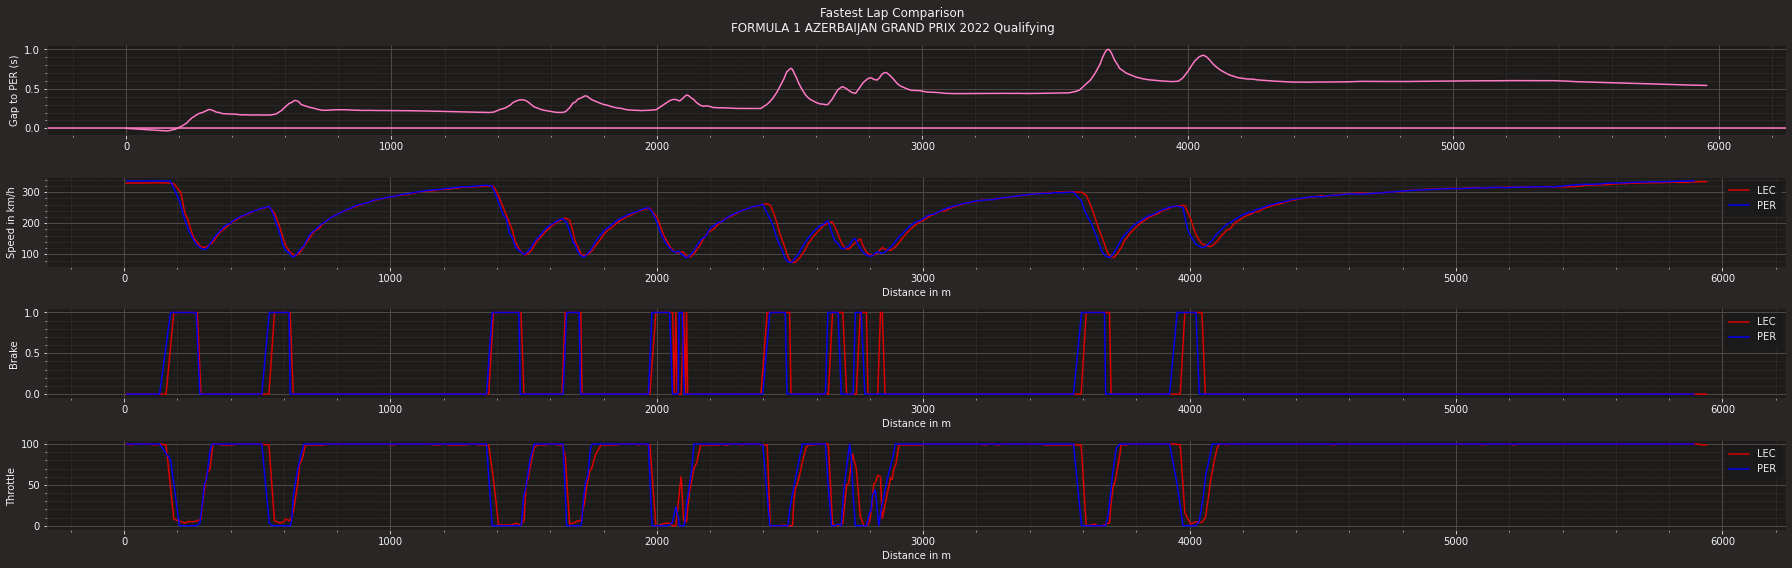

In [20]:
fig, ax = plt.subplots(4)
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {fastest_2.Driver} (s)")

ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], color=driver1_color, label=driver1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], color=driver2_color, label=driver2)

ax[1].set_xlabel('Distance in m')
ax[1].set_ylabel('Speed in km/h')

ax[1].legend()

ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], color=driver1_color, label=driver1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], color=driver2_color, label=driver2)

ax[2].set_xlabel('Distance in m')
ax[2].set_ylabel('Brake ')

ax[2].legend()

ax[3].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], color=driver1_color, label=driver1)
ax[3].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], color=driver2_color, label=driver2)

ax[3].set_xlabel('Distance in m')
ax[3].set_ylabel('Throttle ')

ax[3].legend()

plt.suptitle(f"Fastest Lap Comparison  \n"
             f"{nameevent} {session.name}  ")
fig.set_size_inches(25, 8)
plt.savefig(nameevent +' '+session.name+'telecomparision.jpg')
plt.tight_layout()
plt.show()

In [21]:
fastest_2.Sector1Time

Timedelta('0 days 00:00:35.642000')

In [22]:
x=fastest_1.telemetry['X']
y=fastest_1.telemetry['Y']
colormap = mpl.cm.plasma
color = fastest_1.telemetry['Speed'] 

In [23]:
telemetrydf=pd.DataFrame(fastest_1.telemetry)

In [24]:

chunksize =  int(telemetrydf.shape[0] / 3)

chunks = [telemetrydf[i:i+chunksize] for i in range(0,telemetrydf.shape[0],chunksize)]

In [25]:
chunks[0]['X']

2      1073
3      1144
4      1229
5      1313
6      1431
       ... 
255   -6280
256   -6302
257   -6323
258   -6438
259   -6528
Name: X, Length: 258, dtype: int64

In [26]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [27]:
points

array([[[1073, -586]],

       [[1144, -557]],

       [[1229, -523]],

       ...,

       [[ 947, -640]],

       [[1056, -595]],

       [[1084, -583]]], dtype=int64)

In [28]:
one=fastest_1.LapTime
two=fastest_2.LapTime
if one<two:
    min=one
    max=two
else:
    min=two
    max=one
delta=max-min

deltams=round(delta.total_seconds()*1000)

In [29]:
#conversion of microseconds and seconds
ms=int(delta.microseconds)
gap=ms/1000000
print(gap)
seconds=delta.seconds
seconds + gap

gap = seconds + gap

0.282


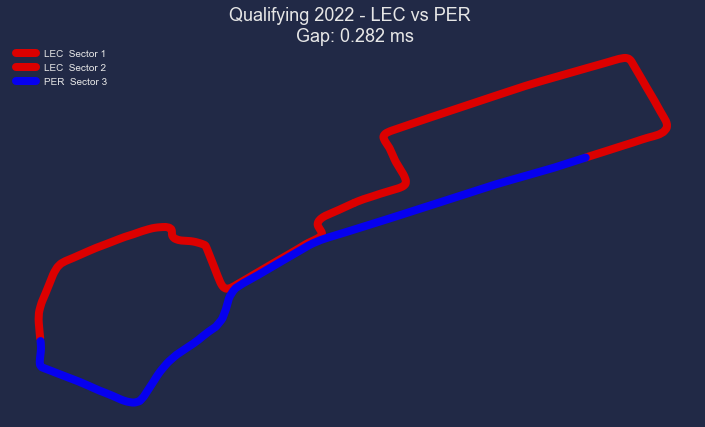

In [49]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{session.name} {year} - {fastest_1.Driver} vs {fastest_2.Driver} \n Gap: {gap} ms', size=18, y=0.97)

# Adjust margins and turn of axis
#fastest1 alo fastest2 sai
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# coloring of sector according to the fastest times  
if fastest_1.Sector1Time<fastest_2.Sector1Time:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 1", linewidth=8, zorder=0)
else:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 1", linewidth=8, zorder=0)
if fastest_1.Sector2Time<fastest_2.Sector2Time:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 2",linewidth=8, zorder=0)
else:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver2_color, linestyle='-', label=driver2+"  Sector 2",linewidth=8, zorder=0)
if fastest_1.Sector3Time<fastest_2.Sector3Time:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver1_color, linestyle='-',label=driver1+"  Sector 3", linewidth=8, zorder=0)
else:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 3    ", linewidth=8, zorder=0)

ax.legend()
mplcyberpunk.make_lines_glow()
plt.show()

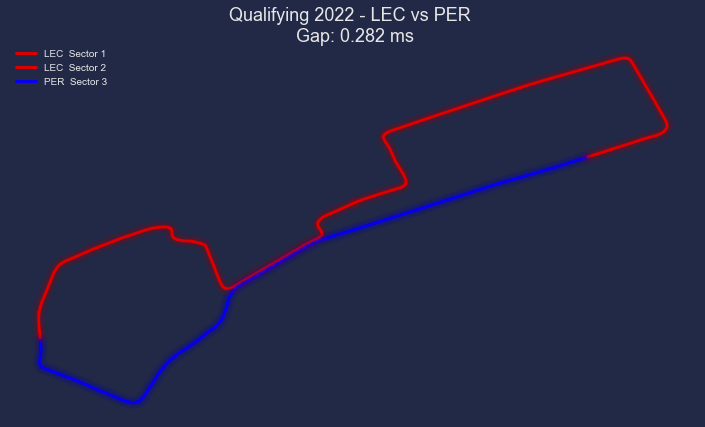

In [46]:

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{session.name} {year} - {fastest_1.Driver} vs {fastest_2.Driver} \n Gap: {gap} ms', size=18, y=0.97)

# Adjust margins and turn of axis
#fastest1 alo fastest2 sai
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# coloring of sector according to the fastest times  
if fastest_1.Sector1Time<fastest_2.Sector1Time:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 1", linewidth=3, zorder=0)
else:
    ax.plot(chunks[0]['X'], chunks[0]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 1", linewidth=3, zorder=0)
if fastest_1.Sector2Time<fastest_2.Sector2Time:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver1_color, linestyle='-', label=driver1+"  Sector 2",linewidth=3, zorder=0)
else:
    ax.plot(chunks[1]['X'], chunks[1]['Y'], color=driver2_color, linestyle='-', label=driver2+"  Sector 2",linewidth=3, zorder=0)
if fastest_1.Sector3Time<fastest_2.Sector3Time:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver1_color, linestyle='-',label=driver1+"  Sector 3", linewidth=3, zorder=0)
else:
    ax.plot(chunks[2]['X'], chunks[2]['Y'], color=driver2_color, linestyle='-',label=driver2+"  Sector 3   ", linewidth=3, zorder=0)

ax.legend()
mplcyberpunk.make_lines_glow()


plt.show()

In [ ]:
# testing code
# print("ALO - Sector 1 time = "+str(fastest_1.Sector1Time))
# print("SAI - Sector 1 time = ",fastest_2.Sector1Time)
# print("ALO - Sector 2 time = ",fastest_1.Sector2Time)
# print("SAI - Sector 2 time = ",fastest_2.Sector2Time)
# print("ALO - Sector 3 time = ",fastest_1.Sector3Time)
# print("SAI - Sector 3 time = ",fastest_2.Sector3Time)


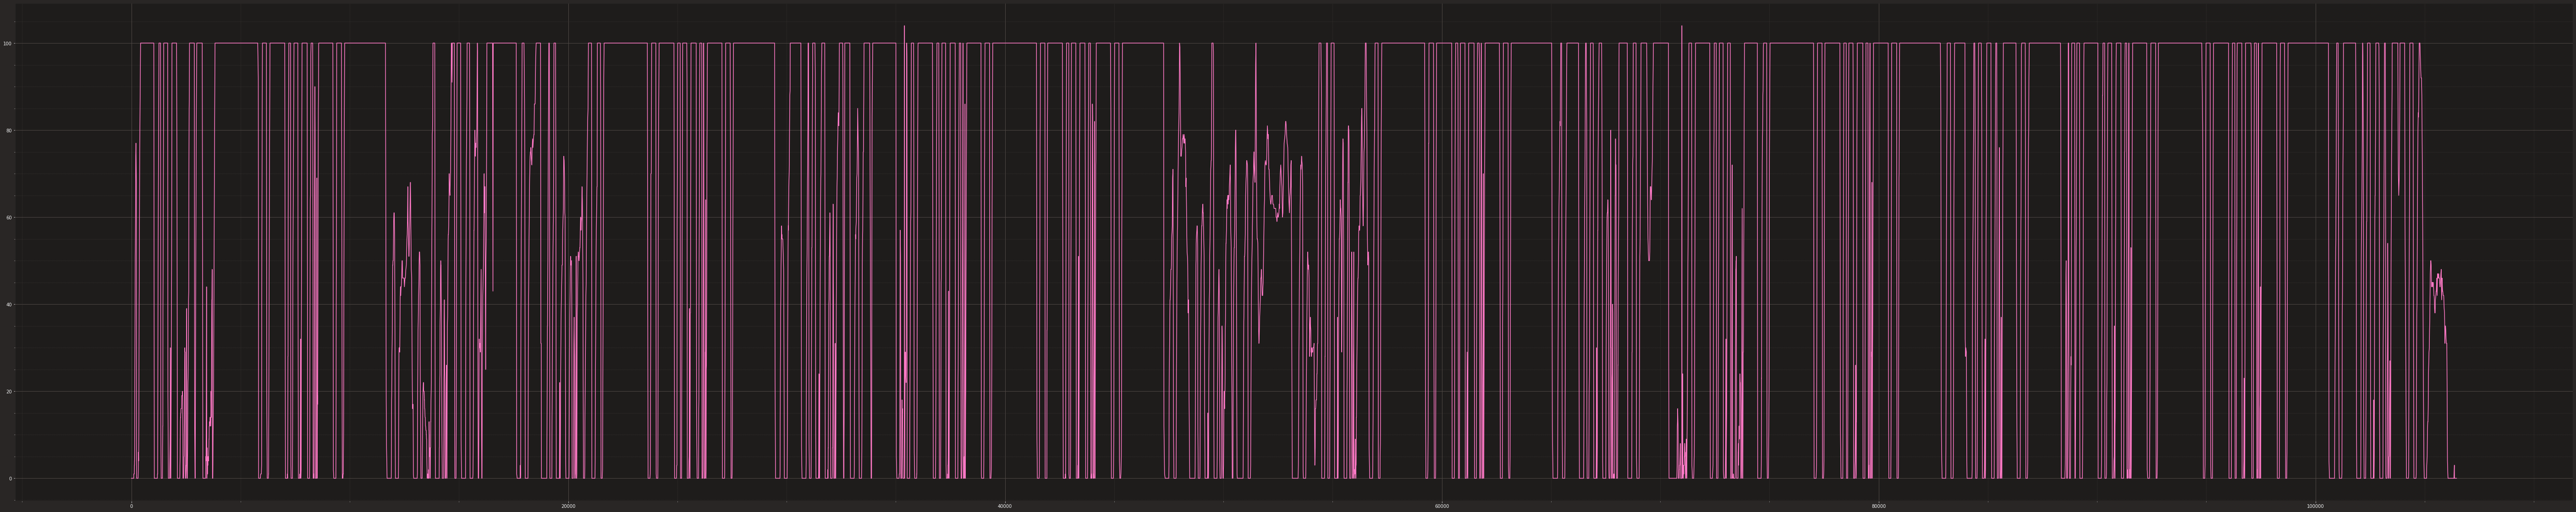

In [ ]:
fig, ax = plt.subplots()
ax.plot(total_race1['Distance'], total_race1['Throttle'])
fig.set_size_inches(100, 20)
plt.show()

In [ ]:
seconds=delta.seconds
seconds + gap

gap = seconds + gap